# Lab 1

This is a sample set of questions you should be able to do after the class on classification with the kNN alogrithm.
You will be guided through parts of this activity and be given hints and suggestions on how to approach the problems.

## Objectives

1. Practice creating a kNN model with data from the class example.
2. Develop some intuition about testing and training accuracy.
3. Consider the tradeoffs between testing and training accuracy when choosing $k$.

## Specifications

1. The notebook should be tidy, well-organized, and all questions should be answered correctly.
2. It should be intuitive what your code is doing, or there should be comments providing an explanation.
3. All visualizations should be well-titled, labeled, and be styled as per MDS expectations.
4. Insight and explanations should be provided for all reflection questions.

## Function imports

In [123]:
import altair as alt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Task 1: Choosing the right $k$ value

When we setup our classifier, we can control the $k$ value, which sets the number of neighbours the $k$NN algorithm should consider.
To choose an ideal $k$ value, we need to optimize the hyperparameter $k$ - we can do this by running the classification a bunch of times and and consider the tradeoffs between bias (training error) and variance (testing error). See [here](https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb) for a nice discussion of this.

### Task 1.1 Load the data and setup a classifier with $k=9$.

Use the same training data and increase the number of "neighbours", or the $k$ value.

In [124]:
# Your Solution here

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(train[["vertices", "dots", "blob"]])
train_s = scaler.transform(train[["vertices", "dots", "blob"]])
test_s = scaler.transform(test[["vertices", "dots", "blob"]])

classifier = KNN(n_neighbors=9, metric="euclidean")

classifier.fit(X=train_s[["vertices", "dots", "blob"]], y=train["stroke"])

train_predictions = classifier.predict(train_s[["vertices", "dots", "blob"]])

### Task 1.2: Use `sklearn.metrics.accuracy_score` to compute the training and test data accuracy of the new model.

In [125]:
# Your Solution here

f"The Training accuracy is: { 100*accuracy_score(train['stroke'], train_predictions):.1f} %!"

'The Training accuracy is: 70.1 %!'

In [126]:
# Your Solution here

test_predictions = classifier.predict(test_s[["vertices", "dots", "blob"]])
accuracy_score(test["stroke"], test_predictions)

f"The Training accuracy is: { 100*accuracy_score(test['stroke'], test_predictions):.1f} %!"

'The Training accuracy is: 66.1 %!'

### Task 1.3: Do this classification for many $k$ values between 1 to 500

You should construct a dataframe where each row contains the $k$ value, the training accuracy and the test accuracy.

In [127]:
# Your Solution here

results_dict = []

for i in range(1, 100):

    classifier = KNN(n_neighbors=i, metric="euclidean")
    classifier.fit(X=train_s[["vertices", "dots", "blob"]], y=train["stroke"])
    train_predictions = classifier.predict(train_s[["vertices", "dots", "blob"]])
    test_predictions = classifier.predict(test_s[["vertices", "dots", "blob"]])

    results_dict.append(
        {
            "k-value": i,
            "train_accuracy": accuracy_score(train["stroke"], train_predictions),
            "test_accuracy": accuracy_score(test["stroke"], test_predictions),
        }
    )

kdf = pd.DataFrame.from_dict(results_dict)

kdf.head()

,k-value,train_accuracy,test_accuracy
0,1,0.680957,0.607008
1,2,0.660587,0.610795
2,3,0.697774,0.631629
3,4,0.697537,0.647727
4,5,0.702511,0.650568


### Task 1.4 Plot the accuracy vs. $k$

The plot and the analysis here should help you see that our classifier is not behaving well - why do you think that is?

> Hint: refer back to the visualization of the data from the class notes! This is happening likely because there exists several cases where data points with the same features are categorized by `1` and `0`!

Text(0.5, 1.0, 'Testing and Training Accuracy vs. $k$')

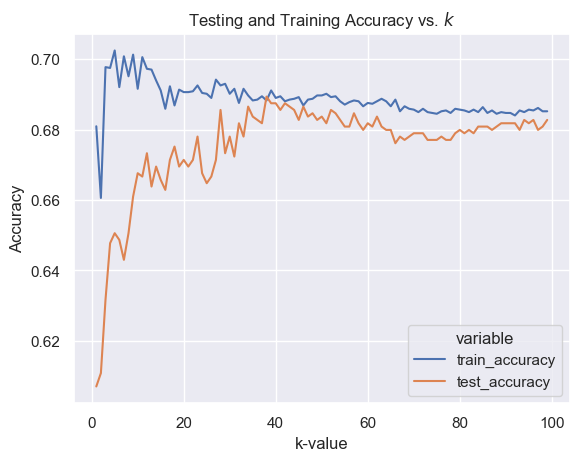

In [128]:
# Your Solution here

# Plot the accuracy vs. $k$
kdf_melted = kdf.melt(id_vars="k-value")
sns.lineplot(kdf_melted, x="k-value", y="value", hue="variable")
plt.ylabel("Accuracy")
plt.title("Testing and Training Accuracy vs. $k$")

### Task 1.5. For which $k$ value is the test and train accuracy highest?

In [129]:
# Your Solution here

print(
    f"Training Accuracy is highest when k = {int(kdf.loc[kdf['train_accuracy'].idxmax()]['k-value'])}",
    "\n",
    f"Testing Accuracy is highest when k = {int(kdf.loc[kdf['test_accuracy'].idxmax()]['k-value'])}",
)

Training Accuracy is highest when k = 5 
 Testing Accuracy is highest when k = 38


## Task 2: Beyond Accuracy

So far we've only looked at "accuracy" as a metric to evaluate our models.
Starting next class, we'll be looking at other metrics for evaluating the quality of our machine learning models.
To prepare that, brainstorm aspects that you think would be useful to consider in evaluating model quality.
You don't have to "define" the metrics mathematically, but I do want you to think (for instance) about things like the impacts of a model successfully predicting an output, and the consequences when a model incorrectly predicts an output.

Answer in 5-7 sentences and be sure to cite any sources you use or find while you explore this topic.

In [ ]:
# Your solution here

## Lab submission instructions

*Usual lab instructions on submitting are here.*

## Grading Scheme (NEW!)

Many of you are familiar with the "Traditional Grading" model that is in place in most courses.
Briefly, this model involves earning (or losing) points on individual assessments throughout the course, and then a grade calculated by doing a "weighted-average" throughout the term.

You may be surprised to learn that this is not the only way classes can be structured, and there are alternative models that research has shown to be far better for learning, motivation, attitudes, and long-term benefit.
If you're interested in learning more details about the last sentence (and if it surprises you), I encourage you to [check out this very accessible paper](https://www.lifescied.org/doi/full/10.1187/cbe.cbe-14-03-0054) from Schinske and Tanner.

I am not quite ready to fully move away from Traditional Grading yet (mostly because of a lack of resources, otherwise I'm totally all-in!) but I'd like to experiment with a modified version of Specifications-Grading here in this course.
I'd love to hear your feedback on it!
Here are some [key features](https://twitter.com/siwelwerd/status/1472940473924960261) of Specifications Grading:

- Each assignment is accompanied with a clear list of "specifications" of what constitutes acceptable work at each level.
- Assignments are marked based on whether students have met each of the specifications for that assignment.
- Students are given multiple opportunities to revise their work to demonstrate their learning.

In this course, the image below shows a handy guide to help you understand this grading system: 

<img src="imgs/specifications_rubric.png" width="100%">

I prefer **not** to associate percentages or grades to the levels (I personally feel that this hampers your learning and poisons motivation and creativity), but I know that it will take us some time to eliminate grades completely.
If you must think of things in terms of numbers and percentages, you can expand the box below to see my best guess of what each level translates into.

- The **E**, or "Excellent" level is about 100%.
- The **G**, or "Good" level is about 85%.
- The **R**, or "Revision Required"  level is < 50%.
- The **I** or "Incomplete" level is not associated with a number because it was not graded.

### Resubmission Policy

This term, you will be able to resubmit your work up to a maximum of 2 times after you have received feedback.
Each time you do a resubmission, you will first need to reflect on your initial submission, and discuss how you corrected your work after receiving feedback from the TAs.

Your resubmission request can be submitted on Ed Discussion but we reserve the right to decline your resubmission if the quality and depth of your reflection is not up to our specifications.